# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [27]:
x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])

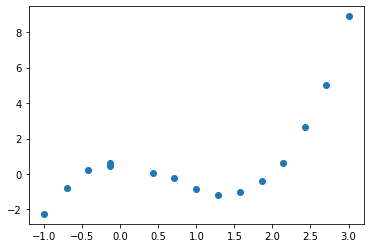

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

<b>NOTE:</b> I tried numpy.linalg.solve and failed because it only suitable for quadratic matrices

In [40]:
import numpy as np
from scipy.linalg import lu as PLU
MAX_DEGREE = 50

def get_design_matrix(x, degree=2):
    return np.vander(x, degree)

degrees = list(range(MAX_DEGREE))[2:]
design_matrices = list(map(get_design_matrix, [x]*len(degrees), degrees))
solutions = list(map(lambda A, y: np.linalg.lstsq(A, y)[0],
                     design_matrices,
                     [y]*len(design_matrices)))

<ipython-input-40-7fb44b7b33a8>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solutions = list(map(lambda A, y: np.linalg.lstsq(A, y)[0],


In [53]:
def draw_fittings(x, y, design_matrix, solution, title):
    import matplotlib.pyplot as plt
    plt.scatter(x, y)
    plt.plot(x, np.dot(design_matrix, solution))
    plt.title(title)
    plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [44]:
def sigma_squared(design_matrix, solution, y_actual, m, n):
    y_pred = np.dot(design_matrix, solution)
    return np.sum((y_pred - y_actual)**2)/(n-m)


for m in range(len(solutions)):
    metrics = sigma_squared(design_matrices[m], solutions[m], y, m, len(design_matrices))
    print(f"[{m}]: {metrics}")

[0]: 1.29797962778931
[1]: 0.6786074674155174
[2]: 0.0032532780260169513
[3]: 0.0030458774093024355
[4]: 0.002863649836438771
[5]: 0.0024259842629176884
[6]: 0.0023407698583689206
[7]: 0.0019752585530030775
[8]: 0.0019396567772804432
[9]: 0.0018279384092817674
[10]: 0.000566253442495265
[11]: 0.0005780311358916883
[12]: 0.0005555555555555557
[13]: 0.0005714285714285716
[14]: 0.0005882352941176511
[15]: 0.0006060606060606302
[16]: 0.0006250000000001154
[17]: 0.0006451612903242811
[18]: 0.0006666666666675535
[19]: 0.0006896551724433269
[20]: 0.000714285714416575
[21]: 0.0007407407407495204
[22]: 0.000769230771618824
[23]: 0.0008000000116877344
[24]: 0.0008333334912223357
[25]: 0.0008695655156417408
[26]: 0.0009091078256677956
[27]: 0.0009549689807043147
[28]: 0.0010052050937560696
[29]: 0.0010599213150232726
[30]: 0.002714933780410008
[31]: 0.004748704777873188
[32]: 0.05870993507972798
[33]: 0.20913319404997296
[34]: 0.35302490682547777
[35]: 0.54085065412177
[36]: 0.5895162499505188
[3

<b>Summary</b>: As seen from computations above 12 degree is appropriate

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

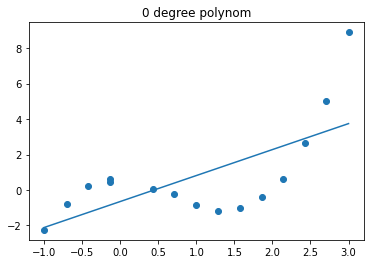

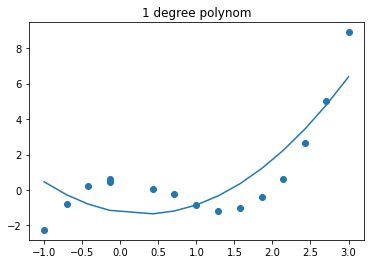

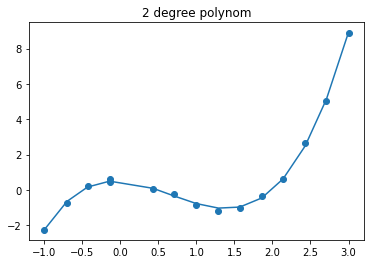

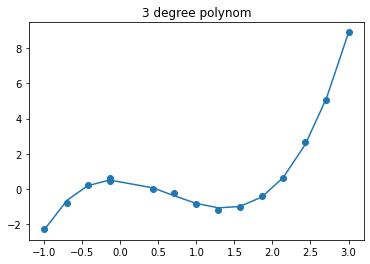

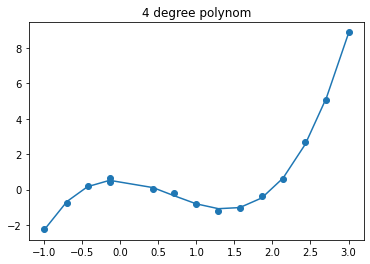

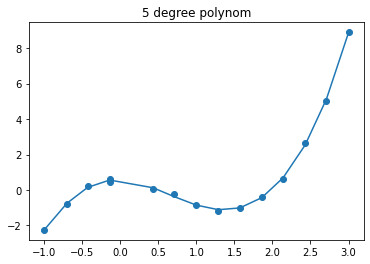

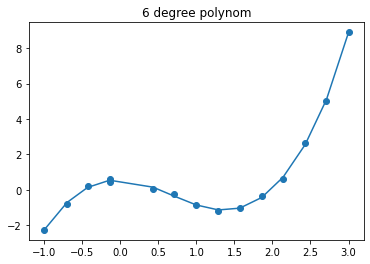

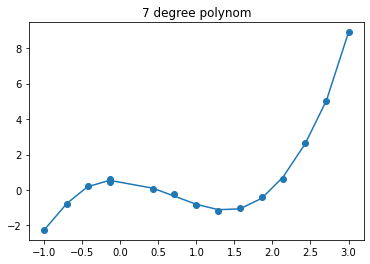

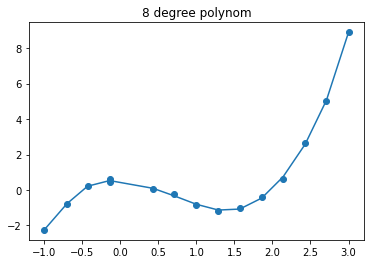

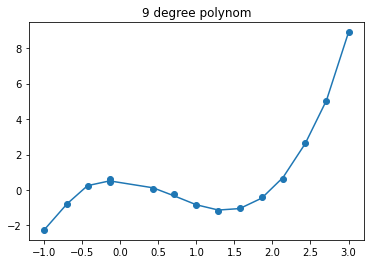

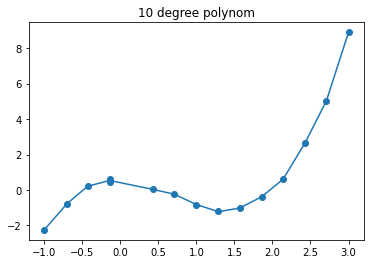

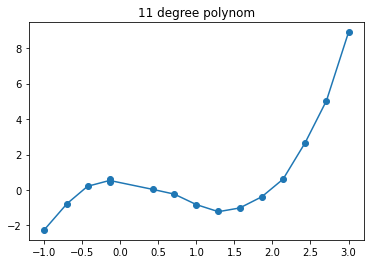

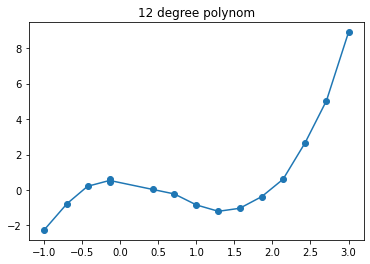

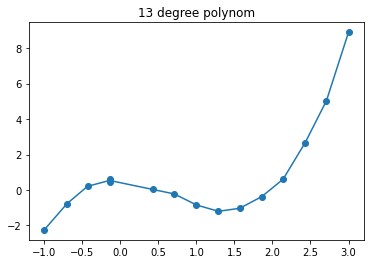

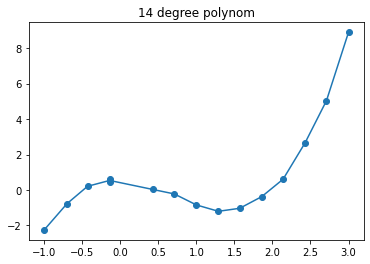

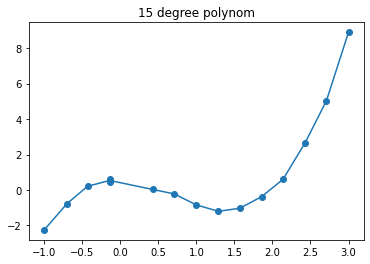

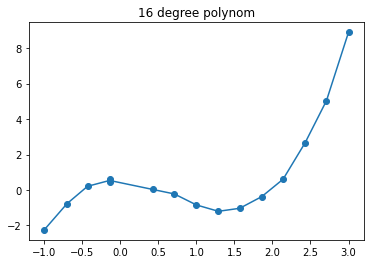

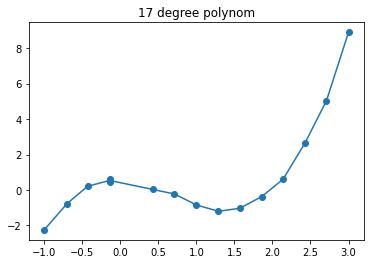

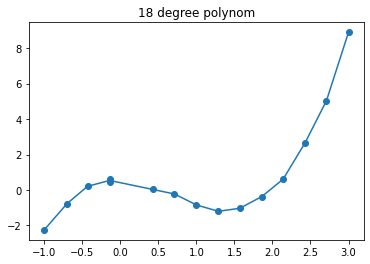

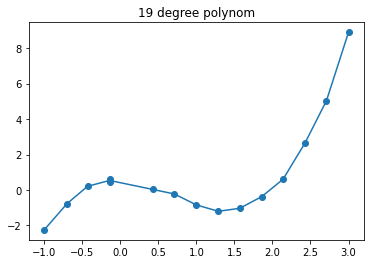

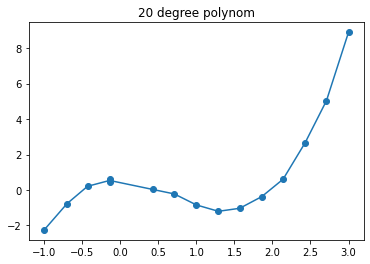

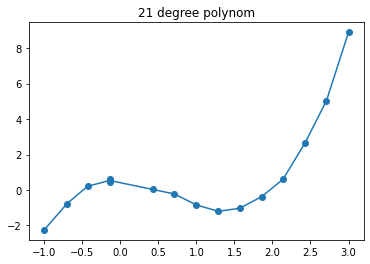

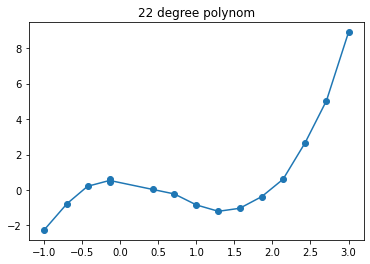

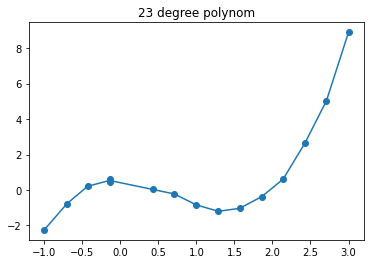

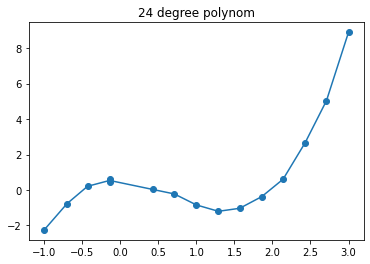

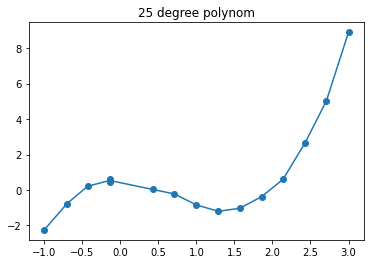

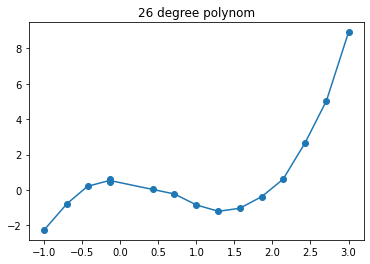

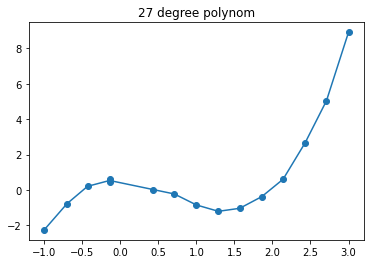

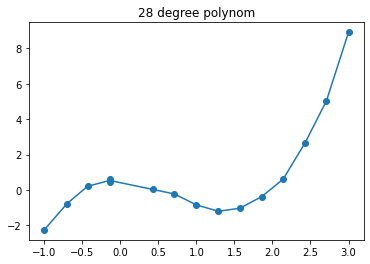

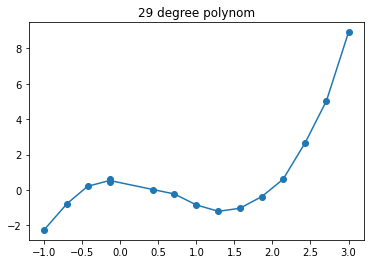

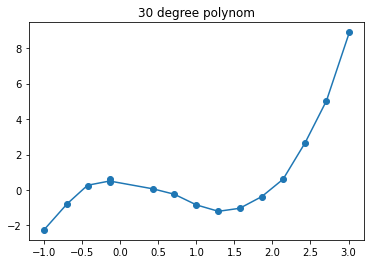

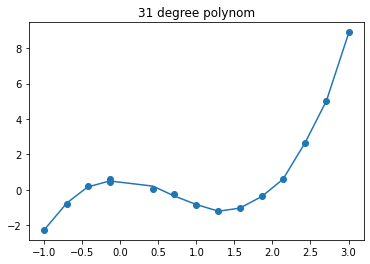

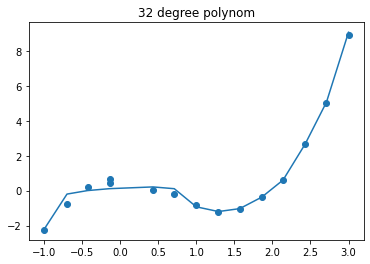

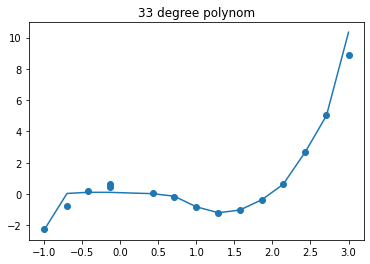

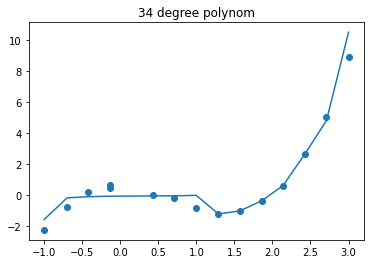

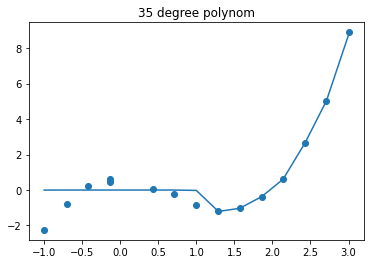

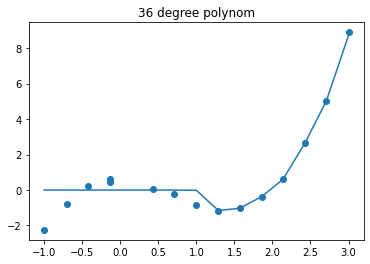

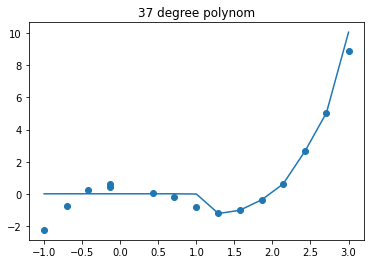

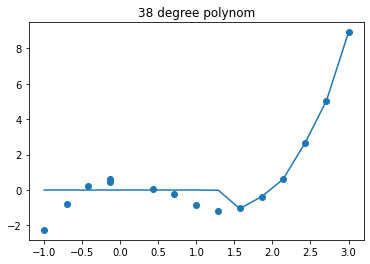

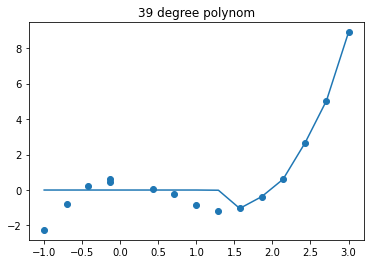

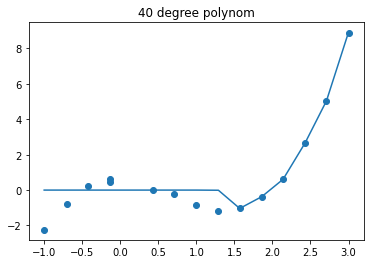

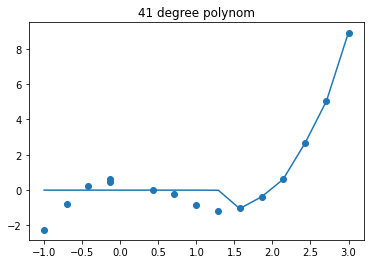

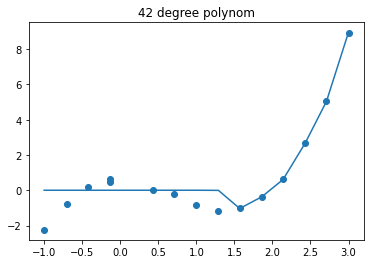

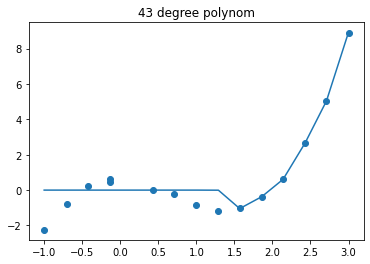

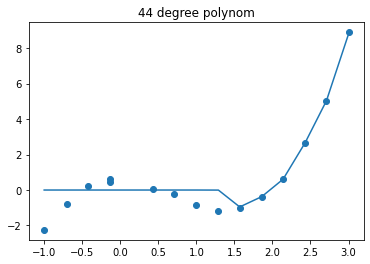

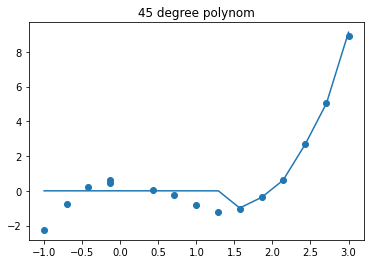

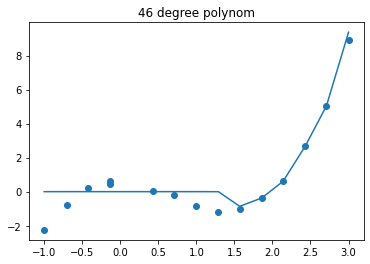

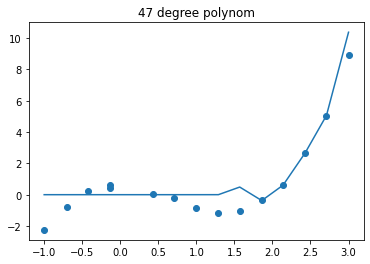

In [54]:
for m in range(len(solutions)):
    draw_fittings(x, y, design_matrices[m], solutions[m], f"{m} degree polynom")

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

In [ ]:
# ... ENTER YOUR CODE HERE ...